In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys


try:
    cnx = mysql.connector.connect(user='dan', password='',
                                  host='127.0.0.1',
                                  database='mlb')
    print('Successfully connected to mySQL DB')
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)

curA = cnx.cursor()

alltasks = {}
for task in ['money','total','spread']:
    alltasks[task] = None
    query = ("""


            SELECT 

            subq.*,
            CASE WHEN winner = bet THEN 1 ELSE 0 END bet_win

            FROM

            (

            select
            preds.gid,
            preds.game_date,
            '"""+task+"""' as task,
            preds.payoutodds1, 
            preds.payoutodds0,
            preds.probabilities1,
            preds.probabilities0,
            preds.prediction,
            preds.area1,
            preds.area0,
            preds.bet,
            CASE WHEN preds.bet = 1 THEN probabilities1 WHEN preds.bet = 0 THEN probabilities0 END bet_probability,
            CASE WHEN preds.bet = 1 THEN area1 WHEN preds.bet = 0 THEN area0 END bet_area,
            CASE WHEN preds.bet = 1 THEN payoutodds1 WHEN preds.bet = 0 THEN payoutodds0 END bet_payoutodds,
            CASE WHEN '"""+task+"""' = 'money' THEN
                CASE WHEN br.money_winner = 'home' THEN 0 ELSE 1 END
            WHEN '"""+task+"""' = 'spread' THEN
                CASE WHEN br.spread_winner = 'home' THEN 0 ELSE 1 END
            WHEN '"""+task+"""' = 'total' THEN
                CASE WHEN br.total_winner = 'over' THEN 0 ELSE 1 END 
            ELSE 999 END as winner
            from theDoc_logs_preds"""+task+""" preds
            JOIN betting_results br ON br.gid = preds.gid
            WHERE br.away_score IS NOT NULL AND br.home_score IS NOT NULL
            ) as subq
            ;

    """)

    curA.execute(query)

    cur_columns = curA.column_names
    threshresults = pd.DataFrame(np.array(curA.fetchall()))
    threshresults.columns = cur_columns

    alltasks[task] = threshresults

print(alltasks['total'].columns)

curA.close()
cnx.close()

for task in ['money','total','spread']:
    for col in set(alltasks[task].columns) - set(['task','game_date','gid']):
        alltasks[task][col] = alltasks[task][col].astype(float)
        
print('done')

Successfully connected to mySQL DB
Index(['gid', 'game_date', 'task', 'payoutodds1', 'payoutodds0',
       'probabilities1', 'probabilities0', 'prediction', 'area1', 'area0',
       'bet', 'bet_probability', 'bet_area', 'bet_payoutodds', 'winner',
       'bet_win'],
      dtype='object')
done


In [2]:
activetasks = {}
activetasks['total'] = alltasks['total'][(alltasks['total']['game_date'] >= datetime.date(2017,7,1)) & (alltasks['total']['bet_area'] >= 0)]
activetasks['money'] = alltasks['money'][(alltasks['money']['game_date'] >= datetime.date(2017,7,8)) & (alltasks['money']['bet_area'] >= 0)]
activetasks['spread'] = alltasks['spread'][alltasks['spread']['game_date'] >= datetime.date(2097,7,1)]





----- money -----



//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


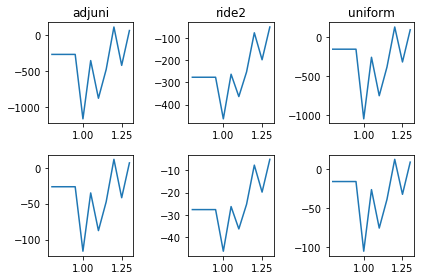

     adjuni  adjuni_p       cov  mean_odds  n_games  optimal_ride   ride2  \
0   -264.51    -26.45 -0.042500   2.397833      978      0.028295 -276.49   
1   -264.51    -26.45 -0.042500   2.397833      978      0.028295 -276.49   
2   -264.51    -26.45 -0.042500   2.397833      978      0.028295 -276.49   
3   -264.51    -26.45 -0.042500   2.397833      978      0.028295 -276.49   
4  -1160.60   -116.06 -0.034814   2.469984      842      0.008196 -464.25   
5   -350.55    -35.06 -0.035626   2.553538      695      0.018515 -262.91   
6   -874.08    -87.41 -0.033924   2.641304      560      0.005700 -363.70   
7   -473.67    -47.37 -0.033726   2.737136      449      0.010387 -252.25   
8    116.45     11.64 -0.039895   2.829944      357      0.025337  -75.89   
9   -417.01    -41.70 -0.036248   2.913415      284      0.008149 -197.62   
10    67.53      6.75 -0.043999   3.017919      221      0.025517  -49.76   

    ride2_p  thresh      uni   uni_p        wp    z_area         zg  
0    

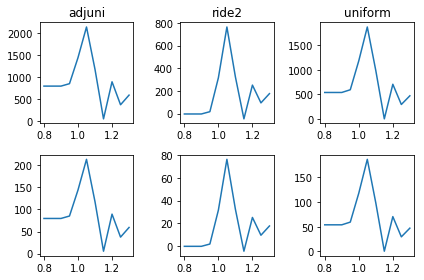

     adjuni  adjuni_p       cov  mean_odds  n_games  optimal_ride   ride2  \
0    796.02     79.60 -0.000405   1.927318     1071      0.010296   -3.41   
1    796.02     79.60 -0.000405   1.927318     1071      0.010296   -3.41   
2    796.02     79.60 -0.000405   1.927318     1071      0.010296   -3.41   
3    851.02     85.10 -0.000370   1.927250     1070      0.011276   16.93   
4   1438.67    143.87 -0.001466   1.933384      828      0.029358  316.58   
5   2131.87    213.19 -0.002864   1.939999      591      0.064117  764.92   
6   1173.66    117.37 -0.001573   1.946939      404      0.048321  323.98   
7     56.07      5.61 -0.001141   1.949675      257      0.001463  -46.48   
8    893.59     89.36 -0.000932   1.956233      167      0.081241  251.70   
9    374.58     37.46  0.003018   1.959654       87      0.061130   94.66   
10   592.55     59.26  0.009753   1.967932       45      0.186748  176.35   

    ride2_p  thresh      uni   uni_p        wp    z_area         zg  
0    

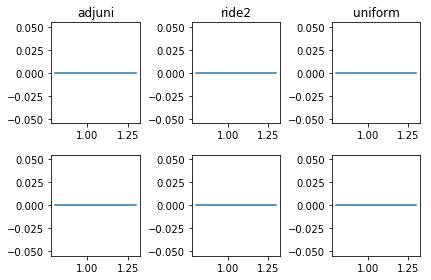

    adjuni  adjuni_p  cov  mean_odds  n_games  optimal_ride  ride2  ride2_p  \
0        0         0 -0.0        NaN        0           NaN      0      0.0   
1        0         0 -0.0        NaN        0           NaN      0      0.0   
2        0         0 -0.0        NaN        0           NaN      0      0.0   
3        0         0 -0.0        NaN        0           NaN      0      0.0   
4        0         0 -0.0        NaN        0           NaN      0      0.0   
5        0         0 -0.0        NaN        0           NaN      0      0.0   
6        0         0 -0.0        NaN        0           NaN      0      0.0   
7        0         0 -0.0        NaN        0           NaN      0      0.0   
8        0         0 -0.0        NaN        0           NaN      0      0.0   
9        0         0 -0.0        NaN        0           NaN      0      0.0   
10       0         0 -0.0        NaN        0           NaN      0      0.0   

    thresh  uni  uni_p  wp  z_area  zg  
0     0.80

In [4]:
ride = 2



for task in ['money','total','spread']:
    print('\n\n\n-----',task,'-----\n')
    threshpayouts = areathresholdanalysis(activetasks[task],'winner','bet','bet_payoutodds','bet_probability','bet_area',ride=ride)
    threshpayouts = pd.DataFrame(threshpayouts)
    print(pd.DataFrame(threshpayouts))



total




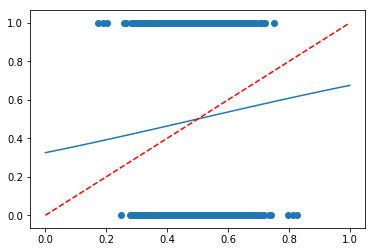

probcal_slope: 0.350004366584


money




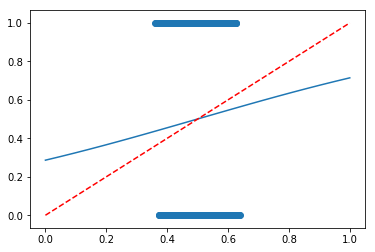

probcal_slope: 0.428019561673


spread




ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [5]:
print('\n\ntotal\n\n')
prob_cal(activetasks['total'],"bet_probability","winner",type_="sigmoid")
print('\n\nmoney\n\n')
prob_cal(activetasks['money'],"bet_probability","winner",type_="sigmoid")
print('\n\nspread\n\n')
prob_cal(activetasks['spread'],"bet_probability","winner",type_="sigmoid")

In [6]:
activetasks = {}
activetasks['total'] = alltasks['total'][(alltasks['total']['game_date'] >= datetime.date(2017,7,1)) & (alltasks['total']['bet_area'] >= 1.0)]
activetasks['money'] = alltasks['money'][(alltasks['money']['game_date'] >= datetime.date(2017,7,8)) & (alltasks['money']['bet_area'] >= 1.2)]
activetasks['spread'] = alltasks['spread'][alltasks['spread']['game_date'] >= datetime.date(2097,7,1)]



----- all active -----



//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


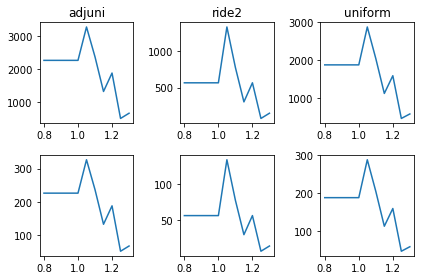

     adjuni  adjuni_p       cov  mean_odds  n_games  optimal_ride    ride2  \
0   2259.98    226.00 -0.041366   2.186226      996      0.063692   567.06   
1   2259.98    226.00 -0.041366   2.186226      996      0.063692   567.06   
2   2259.98    226.00 -0.041366   2.186226      996      0.063692   567.06   
3   2259.98    226.00 -0.041366   2.186226      996      0.063692   567.06   
4   2259.98    226.00 -0.041366   2.186226      996      0.063692   567.06   
5   3270.46    327.05 -0.053868   2.252681      797      0.095215  1335.63   
6   2365.76    236.58 -0.057803   2.333460      640      0.086756   777.41   
7   1318.01    131.80 -0.057642   2.432513      512      0.068049   304.54   
8   1876.18    187.62 -0.066379   2.519353      436      0.087243   567.39   
9    502.11     50.21 -0.065523   2.646355      305      0.056639    76.66   
10   659.82     65.98 -0.081072   2.791213      220      0.072115   148.47   

    ride2_p  thresh      uni   uni_p        wp    z_area       

In [7]:
ride = 2

allactive = pd.concat([activetasks['total'],activetasks['money'],activetasks['spread']],axis=0)

print('\n----- all active -----\n')
threshpayouts = areathresholdanalysis(allactive.sample(frac=1),'winner','bet','bet_payoutodds','bet_probability','bet_area',ride=ride)
threshpayouts = pd.DataFrame(threshpayouts)

print(threshpayouts)



In [3]:
def roc_curve(y_test,y_score,n_classes=2):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
             #lw=lw, label='ROC curve (area = {0.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()   
    
def payoutcalc(outcomes,bets,odds,bet_probs=None,strategy="uniform",ride_p=5):
    
    payout = 0
    nullodds = 0

    if strategy == "uniform":
        
        start_bank = 1000
        bet = 55
        
        if len(outcomes) == 0:
            return 0,0
        
        else:

            for i in range(len(outcomes)):
                if outcomes[i] == bets[i]:
                    if np.isnan(odds[i]) == True:
                        nullodds += 1
                        payout += bet
                    else:
                        payout += (odds[i]-1)*bet
                else:
                    payout -= bet

            return payout, (payout/(start_bank))*100
        
    if strategy == "adjuniform":
        
        start_bank = 1000
        bet_0 = 55
        
        if len(outcomes) == 0:
            return 0,0
        
        else:

            for i in range(len(outcomes)):
                if np.isnan(odds[i]) == True:
                    nullodds += 1
                    bet = bet_0
                else:
                    if (bet_probs[i]*odds[i]) < 1:
                        bet_p = 0.00
                    else:
                        bet_p = (((bet_probs[i]*odds[i])-1)/(odds[i]-1))
                bet = bet_0 + (bet_p*bet_0)
                if outcomes[i] == bets[i]:
                    payout += bet*(odds[i]-1)
                else:
                    payout -= bet

            return payout, (payout/(start_bank))*100
    
    elif strategy == "ride":
        start_bank = 1000
        bank = 1000
        bank_string = [bank]
        for i in range(len(outcomes)):
            bet = (ride_p/100)*bank
            if outcomes[i] == bets[i]:
                if np.isnan(odds[i]) == True:
                    nullodds += 1
                    bank += bet
                    bank_string.append(bank)
                else:
                    bank += bet*(odds[i]-1)
                    bank_string.append(bank)
            else:
                bank -= bet
                bank_string.append(bank)
        
        #plt.plot(bank_string)
        #plt.show()
                
                
        return bank-start_bank, ((bank-start_bank)/start_bank)*100
    
    elif strategy == "adjride":
        start_bank = 1000
        bank = 1000
        for i in range(len(outcomes)):
            if np.isnan(odds[i]) == True:
                nullodds += 1
                bet_p = 0.02
            else:
                if (bet_probs[i]*odds[i]) < 1:
                    bet_p = 0.00
                else:
                    bet_p = (((bet_probs[i]*odds[i])-1)/(odds[i]-1))
                if bet_p > 0.1:
                    bet_p = 0.1
            bet = bet_p*bank
            if outcomes[i] == bets[i]:
                if np.isnan(odds[i]) == True:
                    bank += bet
                else:
                    bank += bet*(odds[i]-1)
            else:
                bank -= bet
                
        return bank-start_bank, ((bank-start_bank)/start_bank)*100
                
    else:
        print("strategy not found")
                
    print("nullodds:",nullodds)
    

def prob_cal(results_df,prob_col,outcome_col,type_="sigmoid"):
    
    from sklearn import linear_model
    
    results_df = results_df.assign(other_outcome = lambda x: (x.winner-1)**2)
    results_df = results_df.assign(other_prob = lambda x: 1-x.bet_probability)
    
    all_probs = np.concatenate([results_df[prob_col],results_df["other_prob"]])
    all_outcomes = np.concatenate([results_df[outcome_col],results_df["other_outcome"]])
    
    all_probs = all_probs.reshape(-1,1)
    all_outcomes
    
    if type_ == "sigmoid":
        mod = linear_model.LogisticRegression (fit_intercept=True, penalty='l2')
    mod.fit(all_probs,all_outcomes)
    
    results_df = pd.DataFrame(results_df)  
    
    probcal_slope = (mod.predict_proba(1)[:,1] - mod.predict_proba(0)[:,1])[0]
    
    def safe_calibration(x,prob_col):
        safe_x_intercept = 0.5
        if probcal_slope < 1:
            if x[prob_col] >= safe_x_intercept:
                return mod.predict_proba(x[prob_col])[0,1]
            if x[prob_col] < safe_x_intercept:
                return x[prob_col]
        else:
            print("ERROR - probcal_slope > 1")
    
    plt.scatter(all_probs,all_outcomes)
    plt.plot(np.linspace(0,1,22),mod.predict_proba(np.linspace(0,1,22).reshape(-1, 1))[:,1])
    plt.plot([0,1],[0,1],'r--')
    plt.show()    
        
    #print(mod.predict_proba(np.linspace(0,1,2).reshape(-1, 1))[:,1])
    print('probcal_slope:',probcal_slope)
    
    #return results_df, probcal_slope

def take_area(x,probs_col,odds_col):
    if x[odds_col] == None:
        return (x[probs_col]) * 2
    else:
        return (x[probs_col]) * x[odds_col]

def take_bet(x,area0_col,area1_col):
    if x[area0_col] > x[area1_col]:
        return 0
    elif x[area1_col] > x[area0_col]:
        return 1
    else:
        return 0
    
def take_betattr(x,area0_col,area1_col,return0_col,return1_col):
    if x[area0_col] > x[area1_col]:
        return x[return0_col]
    elif x[area1_col] > x[area0_col]:
        return x[return1_col]
    else:
        pass
    
def take_predodds(x,preds_col):
    if x[preds_col] == 1:
        return x["odds1"]
    elif x[preds_col] == 0:
        return x["odds0"]
    else:
        pass
    
def modeleval_pred(outcomes,preds,pred_probs1):
    
    #conf matrix and roc_curve based on model predictions (i.e. most likely predicted outcome)
    
    conf_matrix = pd.DataFrame( metrics.confusion_matrix(preds,outcomes) )
    print(conf_matrix)
    
    auc = metrics.roc_auc_score(outcomes, pred_probs1)
    roc_curve(outcomes, pred_probs1)


def modeleval_payouts(outcomes,bets,bet_odds,bet_probs,ride_p=1):
    
    #payout analysis based on bets (i.e. choice picks greater for payout_odds * predicted win probability)
    
    payout_uni, payout_uni_p = payoutcalc(outcomes,bets,bet_odds,strategy="uniform")
    print('Payout (Uniform Betting): $',payout_uni,'and',payout_uni_p,'%')
    payout_ride, payout_ride_p = payoutcalc(outcomes,bets,bet_odds,strategy="ride",ride_p=ride_p)
    print('Payout (Ride Betting): $',payout_ride,'and',payout_ride_p,'%')
    payout_adjuni, payout_adjuni_p = payoutcalc(outcomes,bets,bet_odds.fillna(2),bet_probs,strategy="adjuniform")
    print('Payout (AdjUniform Betting): $',payout_adjuni,'and',payout_adjuni_p,'%')
    
def betprep(finalresults):
    
    finalresults["area1"] = finalresults.apply(take_area,axis=1,probs_col="probabilities1",odds_col="odds1")
    finalresults["area0"] = finalresults.apply(take_area,axis=1,probs_col="probabilities0",odds_col="odds0")
    finalresults["bet"] = finalresults.apply(take_bet, axis=1,area0_col="area0",area1_col="area1")
    finalresults["betodds"] = finalresults.apply(take_betattr, axis=1,area0_col="area0",area1_col="area1",return0_col="odds0",return1_col="odds1")
    finalresults["betprobs"] = finalresults.apply(take_betattr, axis=1,area0_col="area0",area1_col="area1",return0_col="probabilities0",return1_col="probabilities1")
    finalresults["betarea"] = finalresults.apply(take_betattr, axis=1,area0_col="area0",area1_col="area1",return0_col="area0",return1_col="area1")
    """
    finalresults["emp_area1"] = finalresults.apply(take_area,axis=1,probs_col="emp_probabilities1",odds_col="odds1")
    finalresults["emp_area0"] = finalresults.apply(take_area,axis=1,probs_col="emp_probabilities0",odds_col="odds0")
    finalresults["emp_bet"] = finalresults.apply(take_bet, axis=1,area0_col="emp_area0",area1_col="emp_area1")
    finalresults["emp_betodds"] = finalresults.apply(take_betattr, axis=1,area0_col="emp_area0",area1_col="emp_area1",return0_col="odds0",return1_col="odds1")
    finalresults["emp_betprobs"] = finalresults.apply(take_betattr, axis=1,area0_col="emp_area0",area1_col="emp_area1",return0_col="emp_probabilities0",return1_col="emp_probabilities1")
    finalresults["emp_betarea"] = finalresults.apply(take_betattr, axis=1,area0_col="emp_area0",area1_col="emp_area1",return0_col="emp_area0",return1_col="emp_area1")
    """
    finalresults["pred_odds"] = finalresults.apply(take_predodds, axis=1, preds_col="predictions")
    finalresults["pred_probs"] = finalresults.apply(take_betattr, axis=1,area0_col="probabilities0",area1_col="probabilities1",return0_col="probabilities0",return1_col="probabilities1")

    
def areathresholdanalysis(results_df,outcomes_col,bets_col,odds_col,probabilities_col,area_col,ride=5):
    area_thresholds = np.linspace(0.8,1.30,11)

    thresh_payouts = {"thresh":[],"uni":[],"ride"+str(ride):[],"adjuni":[],"uni_p":[],"ride"+str(ride)+"_p":[],"adjuni_p":[], "n_games":[], "wp":[], "mean_odds":[], "cov":[], "z_area":[], "zg":[], "optimal_ride":[]}
    for threshold in area_thresholds:
        thresh_payouts["thresh"].append(threshold)
        tempresults_df = results_df[results_df[area_col] >= threshold].reset_index()
        
        n_games = len(tempresults_df)
        thresh_payouts["n_games"].append(n_games)
        
        if n_games == 0: wp = 0
        else: wp = sum(tempresults_df['bet_win'])/n_games
        mean_odds = np.mean(tempresults_df['bet_payoutodds'])
        cov = sum((tempresults_df['bet_payoutodds'] - mean_odds)*(tempresults_df['bet_win'] - wp))/(n_games-1)
        z_area = ((mean_odds*wp)+cov) - 1
        zg = z_area * n_games
        
        thresh_payouts["wp"].append(wp)
        thresh_payouts["mean_odds"].append(mean_odds)
        thresh_payouts["cov"].append(cov)
        thresh_payouts["z_area"].append(z_area)
        thresh_payouts["zg"].append(zg)
        
        optimal_ride = ((wp*mean_odds)-1)/(mean_odds-1)
        thresh_payouts["optimal_ride"].append(optimal_ride)
        
        payout_uni, payout_uni_p = payoutcalc(tempresults_df[outcomes_col],tempresults_df[bets_col],tempresults_df[odds_col].fillna(2),strategy="uniform")
        thresh_payouts["uni"].append(np.round(payout_uni,2))
        thresh_payouts["uni_p"].append(np.round(payout_uni_p,2))

        payout_ride, payout_ride_p = payoutcalc(tempresults_df[outcomes_col],tempresults_df[bets_col],tempresults_df[odds_col].fillna(2),strategy="ride",ride_p=ride)
        thresh_payouts["ride"+str(ride)].append(np.round(payout_ride,2))
        thresh_payouts["ride"+str(ride)+"_p"].append(np.round(payout_ride_p,2))

        payout_adjuni, payout_adjuni_p = payoutcalc(tempresults_df[outcomes_col],tempresults_df[bets_col],tempresults_df[odds_col].fillna(2),tempresults_df[probabilities_col],strategy="adjuniform")
        thresh_payouts["adjuni"].append(np.round(payout_adjuni,2))
        thresh_payouts["adjuni_p"].append(np.round(payout_adjuni_p,2))
        
        
     
    plt.figure(1,tight_layout=True,figsize=(6,4))
    plt.subplot(2,3,3)
    plt.plot(thresh_payouts["thresh"], thresh_payouts["uni"])
    plt.title("uniform")
    plt.subplot(2,3,2)
    plt.plot(thresh_payouts["thresh"], thresh_payouts["ride"+str(ride)])
    plt.title("ride"+str(ride))
    plt.subplot(2,3,1)
    plt.plot(thresh_payouts["thresh"], thresh_payouts["adjuni"])
    plt.title("adjuni")
    plt.subplot(2,3,6)
    plt.plot(thresh_payouts["thresh"], thresh_payouts["uni_p"])
    plt.subplot(2,3,5)
    plt.plot(thresh_payouts["thresh"], thresh_payouts["ride"+str(ride)+"_p"])
    plt.subplot(2,3,4)
    plt.plot(thresh_payouts["thresh"], thresh_payouts["adjuni_p"])
    plt.show()
    plt.close()

    return thresh_payouts

In [112]:
import statsmodels.api as sm

logx = np.array(alltasks['total']['bet_payoutodds']).reshape(-1,1) - 1
logy = np.array(alltasks['total']['bet_win'])

mod = sm.GLS(logx,logy)
res = mod.fit()
print(res.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.546
Model:                            GLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     643.6
Date:                Mon, 14 Aug 2017   Prob (F-statistic):           8.21e-94
Time:                        17:47:45   Log-Likelihood:                -514.64
No. Observations:                 536   AIC:                             1031.
Df Residuals:                     535   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9329      0.037     25.369      0.0

In [116]:
print(mod.sigma)

None


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


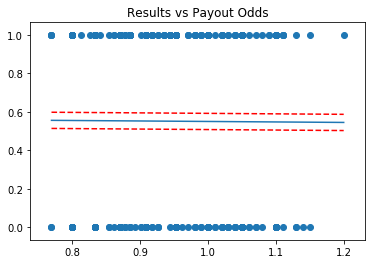

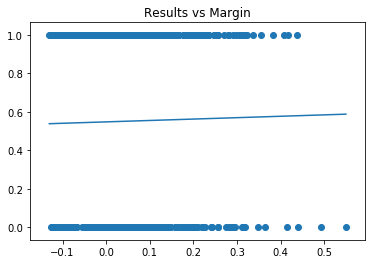

In [96]:
logx = np.array(alltasks['total']['bet_payoutodds']).reshape(-1,1) - 1
logy = np.array(alltasks['total']['bet_win'])

from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(logx,logy)

predx = np.linspace(min(logx),max(logx)).reshape(-1,1)
predy = logreg.predict_proba(predx)[:,1]
sterr = 
uperry = predy + sterr
dnerry = predy - sterr


plt.scatter(logx,logy)
plt.plot(predx,predy)
plt.plot(predx,uperry,'r--')
plt.plot(predx,dnerry,'r--')
plt.legend()
plt.title('Results vs Payout Odds')
plt.show()


logx = np.array(alltasks['total']['bet_area']).reshape(-1,1) - 1
logy = np.array(alltasks['total']['bet_win'])

logreg = linear_model.LinearRegression()
logreg.fit(logx,logy)

predx = np.linspace(min(logx),max(logx)).reshape(-1,1)
predy = logreg.predict(predx)

plt.scatter(logx,logy)
plt.plot(predx,predy)
plt.legend()
plt.title('Results vs Margin')
plt.show()

In [69]:
alltasks['total']

,gid,game_date,task,payoutodds1,payoutodds0,probabilities1,probabilities0,prediction,area1,area0,bet,bet_probability,bet_area,bet_payoutodds,winner,bet_win
0,gid_2017_07_24_atlmlb_arimlb_1/,2017-07-24,total,1.83333,2.00000,0.469495,0.530505,0.0,0.860741,1.061010,0.0,0.530505,1.061009,2.000000,0.0,1.0
1,gid_2017_07_25_atlmlb_arimlb_1/,2017-07-25,total,1.90909,1.95238,0.558927,0.441073,1.0,1.067040,0.861143,1.0,0.558927,1.067042,1.909091,0.0,0.0
2,gid_2017_07_26_atlmlb_arimlb_1/,2017-07-26,total,2.10000,1.76923,0.449292,0.482519,0.0,0.943514,0.853688,1.0,0.449292,0.943514,2.100000,0.0,0.0
3,gid_2017_08_11_chnmlb_arimlb_1/,2017-08-11,total,1.90909,1.90909,0.623312,0.376688,1.0,1.189960,0.719132,1.0,0.623312,1.189959,1.909091,0.0,0.0
4,gid_2017_08_12_chnmlb_arimlb_1/,2017-08-12,total,1.71429,2.10000,0.490722,0.509278,0.0,0.841238,1.069480,0.0,0.509278,1.069483,2.100000,1.0,0.0
5,gid_2017_07_07_cinmlb_arimlb_1/,2017-07-07,total,2.03000,1.87719,0.329473,0.596176,0.0,0.668831,1.119140,0.0,0.596176,1.119138,1.877193,1.0,0.0
6,gid_2017_07_08_cinmlb_arimlb_1/,2017-07-08,total,1.88496,2.02000,0.624673,0.375327,1.0,1.177480,0.758161,1.0,0.624673,1.177480,1.884956,1.0,1.0
7,gid_2017_07_09_cinmlb_arimlb_1/,2017-07-09,total,1.85470,2.06000,0.520144,0.399571,1.0,0.964711,0.823116,1.0,0.520144,0.964711,1.854701,1.0,1.0
8,gid_2017_06_30_colmlb_arimlb_1/,2017-06-30,total,2.00000,1.90909,0.514991,0.397353,1.0,1.029980,0.758583,1.0,0.514991,1.029983,2.000000,1.0,1.0
9,gid_2017_07_01_colmlb_arimlb_1/,2017-07-01,total,2.02000,1.88496,0.472078,0.527922,0.0,0.953598,0.995109,0.0,0.527922,0.995109,1.884956,1.0,0.0
